<a href="https://colab.research.google.com/github/thien1892/Deep-Learning-for-Computer-Vision/blob/main/1_2_How_to_Manually_Scale_Image_Pixel_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Manually Scale Image Pixel Data
# 1. Normalize Pixel Values

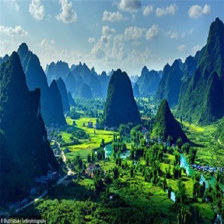

In [1]:
# load image from internet
from urllib.request import urlretrieve
URL = 'http://dulichvietnam.com.vn/data/hinh-anh-viet-nam-1.jpg'
urlretrieve(URL, '/content/nrvm.jpg')

# Open image
import PIL.Image as Image
Image.open('/content/nrvm.jpg').resize((224,224))

In [2]:
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('nrvm.jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


# 2. Center Pixel Values

 The mean can be calculated for all pixels in the image, referred to as a global centering or it can be calculated for each channel in the case of color images, referred to as local centering

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mean: 94.271
Min: 0.000, Max: 255.000
Mean: -0.000
Min: -94.271, Max: 160.729


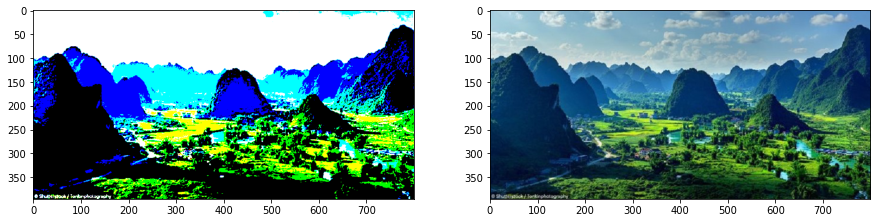

In [24]:
# example of global centering (subtract mean)
from numpy import asarray
from PIL import Image
# load image
image = Image.open('nrvm.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
#show image
from matplotlib import pyplot
from matplotlib import image
pyplot.figure(figsize=(15,8))
pyplot.subplot(121)
pyplot.imshow(pixels)
pyplot.subplot(122)
pyplot.imshow(image.imread('nrvm.jpg'))
pyplot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Means: [ 64.19923611 107.13794192 111.47430871]
Mins: [0. 0. 0.], Maxs: [251. 255. 255.]
Means: [-3.19470971e-07  6.40684268e-07 -1.22607507e-06]
Mins: [ -64.199234 -107.13794  -111.47431 ], Maxs: [186.80077 147.86206 143.5257 ]


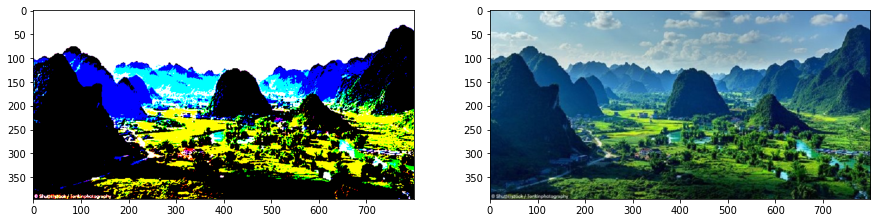

In [26]:
# example of per-channel centering (subtract mean)
from numpy import asarray
from PIL import Image
# load image
image = Image.open('nrvm.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate per-channel means and standard deviations
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
# per-channel centering of pixels
pixels -= means
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
#show image
from matplotlib import pyplot
from matplotlib import image
pyplot.figure(figsize=(15,8))
pyplot.subplot(121)
pyplot.imshow(pixels)
pyplot.subplot(122)
pyplot.imshow(image.imread('nrvm.jpg'))
pyplot.show()

# 3.Standardize Pixel Values
The distribution of pixel values often follows a Normal or Gaussian distribution, e.g. bell shape. This distribution may be present per image, per minibatch of images, or across the training dataset and globally or per channel. As such, there may be benefit in transforming the distribution of pixel values to be a standard Gaussian: that is both centering the pixel values on zero and normalizing the values by the standard deviation. The result is a standard Gaussian of pixel values with a mean of 0.0 and a standard deviation of 1.0.

## 3.1. Global Standardization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mean: 94.271, Standard Deviation: 67.347
Mean: -0.000, Standard Deviation: 1.000


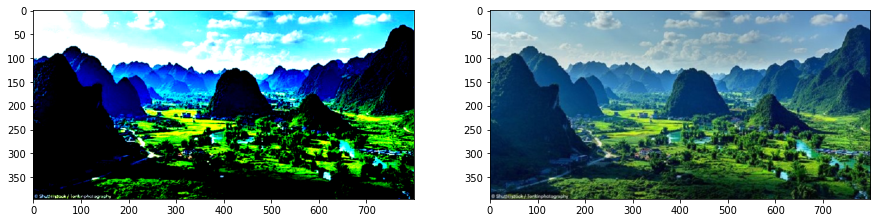

In [27]:
# example of global pixel standardization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('nrvm.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
#show image
from matplotlib import pyplot
from matplotlib import image
pyplot.figure(figsize=(15,8))
pyplot.subplot(121)
pyplot.imshow(pixels)
pyplot.subplot(122)
pyplot.imshow(image.imread('nrvm.jpg'))
pyplot.show()

## 3.2. Positive Global Standardization

Mean: 94.271, Standard Deviation: 67.347
Mean: 0.474, Standard Deviation: 0.395
Min: 0.000, Max: 1.000


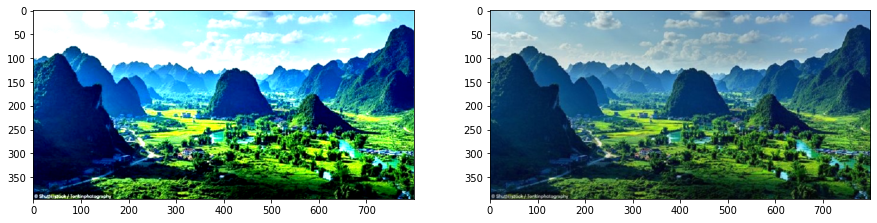

In [29]:
# example of global pixel standardization shifted to positive domain
from numpy import asarray
from numpy import clip
from PIL import Image
# load image
image = Image.open('nrvm.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# clip pixel values to [-1,1]
# refer to: https://numpy.org/doc/stable/reference/generated/numpy.clip.html
pixels = clip(pixels, -1.0, 1.0)
# shift from [-1,1] to [0,1] with 0.5 mean
pixels = (pixels + 1.0) / 2.0
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
#show image
from matplotlib import pyplot
from matplotlib import image
pyplot.figure(figsize=(15,8))
pyplot.subplot(121)
pyplot.imshow(pixels)
pyplot.subplot(122)
pyplot.imshow(image.imread('nrvm.jpg'))
pyplot.show()

# 3.3. Local Standardization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Means: [ 64.19923611 107.13794192 111.47430871], Stds: [61.86974446 63.23624905 66.44059892]
Means: [-5.47462773e-13  1.64097341e-15 -3.72106709e-14], Stds: [1. 1. 1.]


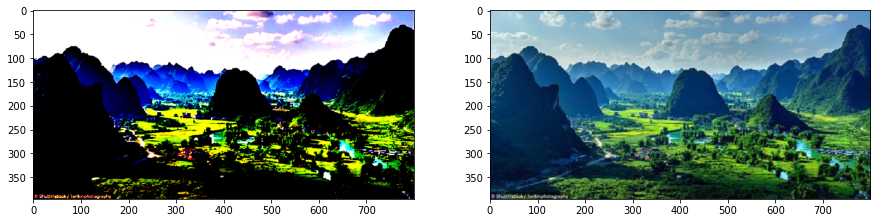

In [30]:
# example of per-channel pixel standardization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('nrvm.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate per-channel means and standard deviations
means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.std(axis=(0,1), dtype='float64')
print('Means: %s, Stds: %s' % (means, stds))
# per-channel standardization of pixels
pixels = (pixels - means) / stds
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.std(axis=(0,1), dtype='float64')
print('Means: %s, Stds: %s' % (means, stds))
#show image
from matplotlib import pyplot
from matplotlib import image
pyplot.figure(figsize=(15,8))
pyplot.subplot(121)
pyplot.imshow(pixels)
pyplot.subplot(122)
pyplot.imshow(image.imread('nrvm.jpg'))
pyplot.show()

# Extentions:
This section lists some ideas for extending the tutorial that you may wish to explore.
-  Develop Function. Develop a function to scale a provided image, using arguments to choose the type of preparation to perform,
-  Projection Methods. Investigate and implement data preparation methods that remove linear correlations from the pixel data, such as PCA and ZCA.
-  Dataset Statistics. Select and update one of the centering or standardization examples to calculate statistics across an entire training dataset, then apply those statistics when preparing image data for training or inference.